<a href="https://colab.research.google.com/github/talhaanwarch/meat_quality_assessment/blob/main/bi_class_autogloun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools
!pip install -U "mxnet<2.0.0"
# Install pre-release, frozen to a particual pre-release for stability
!pip install --pre "autogluon==0.0.16b20201214"
!pip install -U ipykernel

In [2]:
import pandas as pd
files=pd.ExcelFile("/content/Molen_Dataset.xlsx")
files.sheet_names  # see all sheet names



['molen_2class_testing_dwt',
 'molen_2class_testing_raw',
 'molen_2class_training_dwt',
 'molen_2class_training_raw',
 'molen_3class_testing_dwt',
 'molen_3class_testing_raw',
 'molen_3class_training_dwt',
 'molen_3class_training_raw',
 'molen_4class_testing_dwt',
 'molen_4class_testing_raw',
 'molen_4class_training_dwt',
 'molen_4class_training_raw',
 'molen_regression_testing_dwt',
 'molen_regression_testing_raw',
 'molen_regression_training_dwt',
 'molen_regression_training_raw']

In [175]:
train=files.parse("molen_2class_training_raw")
train.head()

,Label,S1,S2,S3,S4,S5,S6,S7
0,0,22.86,41.24,29.56,49.38,2.21,14.29,55.1
1,0,22.75,41.50,29.72,49.38,2.23,14.58,55.1
2,0,22.75,41.50,29.72,49.38,2.22,14.40,55.1
3,0,22.86,42.56,29.56,49.38,2.22,14.64,55.4
4,0,23.07,42.03,29.56,49.38,2.22,14.58,55.4


In [176]:
test=files.parse("molen_2class_testing_raw")
test.head()

,Label,S1,S2,S3,S4,S5,S6,S7
0,0,21.64,32.32,27.53,40.39,2.36,14.88,56.5
1,0,21.64,32.49,27.53,40.67,2.36,14.82,56.5
2,0,21.64,32.49,27.67,40.96,2.37,14.88,56.5
3,0,21.74,32.67,27.81,41.25,2.37,14.94,56.5
4,0,21.74,32.85,27.81,41.25,2.36,14.94,56.5


In [177]:
train.shape,test.shape

((700, 8), (700, 8))

In [178]:
train_feat=train.iloc[:,1::]
train_label=train.iloc[:,0]

In [179]:
test_feat=test.iloc[:,1::]
test_label=test.iloc[:,0]

In [180]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler=MinMaxScaler()
# train_feat=scaler.fit_transform(train_feat)
# test_feat=scaler.transform(test_feat)

In [181]:
train_feat.shape

(700, 7)

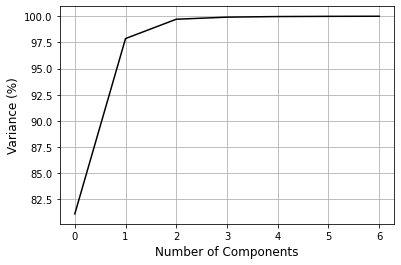

In [182]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

pca = PCA().fit(train_feat)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100),color='k')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance (%)',fontsize=12) #for each component
#plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.savefig('pca_scree.eps')
plt.show()

In [183]:
from sklearn.decomposition import KernelPCA
#pca=PCA(2)
pca=KernelPCA(n_components=2, kernel='poly')
train_feat=pca.fit_transform(train_feat)
test_feat=pca.transform(test_feat)

In [184]:
train_feat.shape

(700, 2)

In [185]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf=SVC()
clf.fit(train_feat,train_label)
print(clf.score(test_feat,test_label))
pred=clf.predict(test_feat)
print(classification_report(test_label,pred))

0.9228571428571428
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       385
           1       0.85      1.00      0.92       315

    accuracy                           0.92       700
   macro avg       0.93      0.93      0.92       700
weighted avg       0.93      0.92      0.92       700



In [186]:
train_feat.shape,test_feat.shape

((700, 2), (700, 2))

In [187]:
train_pca=pd.concat([pd.DataFrame(train_feat),train_label],axis=1)
train_pca.columns=['pca_{}'.format(i) for i in range(train_feat.shape[1])]+['Label']
train_pca.Label=train_pca.Label.map({0:'Fresh',1:"Semi-fresh",2:"Spoiled"})
train_pca.head()

,pca_0,pca_1,Label
0,-32313.837582,21781.789654,Fresh
1,-32434.973103,21993.426414,Fresh
2,-32413.943905,21970.951285,Fresh
3,-32823.334983,22629.988326,Fresh
4,-32702.957585,22390.385695,Fresh


In [188]:
test_pca=pd.concat([pd.DataFrame(test_feat),test_label],axis=1)
test_pca.columns=['pca_{}'.format(i) for i in range(train_feat.shape[1])]+['Label']
test_pca.Label=test_pca.Label.map({0:'Fresh',1:"Semi-fresh",2:"Spoiled"})
test_pca.head()

,pca_0,pca_1,Label
0,-26751.926244,11712.743342,Fresh
1,-26869.296597,11934.181511,Fresh
2,-26985.100198,12147.822926,Fresh
3,-27165.526964,12453.484173,Fresh
4,-27212.201171,12529.177088,Fresh


In [189]:
train_pca.Label.value_counts()

Semi-fresh    406
Fresh         294
Name: Label, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


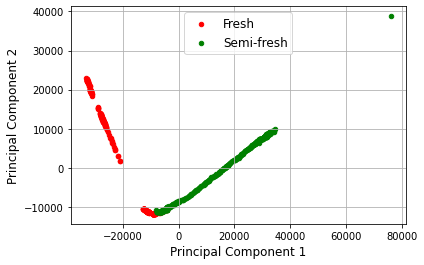

In [190]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
#ax.set_title('2 component PCA', fontsize = 20)
targets = list(train_pca.Label.unique())
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = train_pca['Label'] == target
    ax.scatter(train_pca.loc[indicesToKeep, 'pca_0']
               , train_pca.loc[indicesToKeep, 'pca_1']
               , c = color
               , s = 20)
ax.legend(targets,fontsize = 12,loc='upper center')
ax.grid()
plt.savefig('pca_plot.eps')


In [194]:
%%time
from autogluon.tabular import TabularPrediction as task
clf=task.fit(train_data=train_pca,label='Label',
             #eval_metric='f1_macro',
             hyperparameter_tune=False,feature_prune=False,
            #presets='best_quality'
             )


No output_directory specified. Models will be saved in: AutogluonModels/ag-20210410_202526/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20210410_202526/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    700
Train Data Columns: 2
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Fresh', 'Semi-fresh']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Semi-fresh, class 0 = Fresh
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12620.35 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_me

CPU times: user 6.93 s, sys: 559 ms, total: 7.49 s
Wall time: 6.99 s


In [192]:
res=clf.leaderboard(test_pca, silent=True)


In [193]:
res['score_test']=res['score_test'].round(3)*100
res.iloc[:,0:2]

,model,score_test
0,LightGBMXT,98.0
1,WeightedEnsemble_L1,98.0
2,LightGBMCustom,97.9
3,LightGBM,97.6
4,CatBoost,97.3
5,RandomForestEntr,97.3
6,XGBoost,97.1
7,RandomForestGini,97.1
8,ExtraTreesEntr,94.6
9,ExtraTreesGini,94.6


In [196]:
test_pred = clf.predict(test_pca,model=res.model[0])

In [197]:
perf = clf.evaluate_predictions(y_true=test_pca.Label, y_pred=test_pred)


Evaluation: accuracy on test data: 0.98


In [198]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(test_pca.Label,test_pred))

              precision    recall  f1-score   support

       Fresh       1.00      0.96      0.98       385
  Semi-fresh       0.96      1.00      0.98       315

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700



In [199]:
print(accuracy_score(test_pca.Label,test_pred))

0.98
